# Homework 2: Affine Transforms


In order to successfully complete this assignment, you must follow all the instructions in this notebook and upload your edited ipynb file to [D2L](http://d2l.msu.edu/) with your answers on or before **10:00am on Friday, October 7**.

You may collaborate with other students in this course. However, you may only share ideas with each other, not code or answers.

**Also, note that your section's TA will run your code cells in order (top to bottom) in order to grade your homework submission. So please make sure your code cells work as you intend when you run them in order.**

**BIG HINT:** Read the entire homework before starting.  

In [125]:
# Here are some libraries you may need to use
%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import sympy as sym
import math as mth

---
<a name=Reading-in-example-image-files></a>
# 1.  (26 pts) Linear Transform

In class we discussed several linear transformations: rotation, shearing, scaling and translation. Consider a two-dimensional case. Rotation, shearing and scaling can be represented by $2\times2$ matrices:

$$\begin{bmatrix}x'\\y'\end{bmatrix}=\begin{bmatrix}m_{11}&m_{12}\\m_{21}&m_{22}\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix}$$

where $x,y$ are the original coordinates and $x',y'$ are the transformed ones.

Translation is additive, however, we can also represent it with a matrix multiplication if we enlarge the dimension of vectors by 1 and represent the most generic matrix for any of the four transformations as:

$$\begin{bmatrix}x'\\y'\\1\end{bmatrix}=\begin{bmatrix}m_{11}&m_{12}&m_{13}\\m_{21}&m_{22}&m_{23}\\
0&0&1\end{bmatrix}\begin{bmatrix}x\\y\\1\end{bmatrix}$$

where $x,y$ are the original coordinates and $x',y'$ are the transformed ones. In this case the upper left $2\times2$ block represents rotation, sharing and scaling, while the third column represents translation.


Let us consider a square with its vertices located at $(0,0)$, $(-2,0)$, $(-2,2)$ and $(0,2)$ and find the transformation that maps it onto a diamond with vertices at $(1,0)$, $(0,1)$, $(1,2)$ and $(2,1)$.

(-3.75, 3.75, -2.0, 3.0)

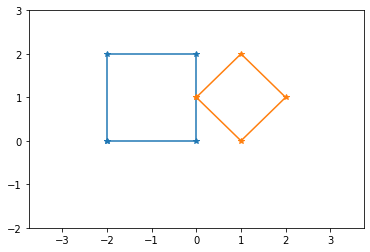

In [126]:
# original points
x  = [ -2, -2, 0, 0, -2 ]
y  = [ 0, 2, 2, 0, 0 ]
# transformed points
xp = [ 0, 1, 2, 1, 0 ]
yp = [ 1, 2, 1, 0, 1 ]

# plot
plt.plot( x, y, "*-" )    # square
plt.plot( xp, yp, "*-" )  # diamond
plt.axis( [-3.75,3.75,-2,3])


&#9989;  **<font color=red>QUESTION 1a:</font>** (5 pts)  We need at least three points to determine the transformation matrix $M$. Take the following three vertices and assume that the transformation $M$ maps: $(0,0)$ to $(1,0)$, $(-2,0)$ to $(0,1)$ and $(-2,2)$ to $(1,2)$ (find these points on the graph to understand what is going on).

Write down a system of $6$ equations for the $6$ unknowns in the matrix $M$. Put down the system in the row form.

Put your answer here

&#9989;  **<font color=red>QUESTION 1b:</font>** (8 pts) Despite that the system of equations you wrote in **1a** is $6\times6$, it is easy to solve with pen and paper. Solve the system with pen and paper and outline what substitutions you made to find the answer. Write down the final answer as $3\times3$ matrix.

Put an outline of what substitutions you made to find the answer here. 

Also, edit the $3 \times 3$ matrix below with your final answer:

$$
\begin{bmatrix}
? & ? & ?\\
? & ? & ?\\
? & ? & ?
\end{bmatrix}
$$

&#9989;  **<font color=red>QUESTION 1c:</font>** (8 pts)  Now use Python to find the 6 values in the matrix $M$ based on the above system of equations, and store them in a $3\times 3$ `numpy.matrix` varibale named `M`. (Replace 0 with your solution below, do not forget to add the third row as `0 0 1`.)

In [ ]:
##Edit this cell to answer the question.

M = 0

In [ ]:
from answercheck import checkanswer
checkanswer.matrix(M,'bfd8207308885370dc1e1252081d82c5');

&#9989;  **<font color=red>QUESTION 1d:</font>** (5 pts)  Now use matrix `M` that you just constructed in Python to calculate where the fourth vertex $(0,2)$ will move after the transform. Store the resulting vector of the form $(x',y',1)$ in variable `V`. What result do you expect based on the figure at the beginning of this exercise?

In [ ]:
##Edit this cell to answer the question.

V = 0

Put your answer here

In [ ]:
from answercheck import checkanswer
checkanswer.vector(V,'359886fa5fb3b5423ef5ff67735b2f5b')


---
<a name=Design-Transforms></a>
# 2.  (28 pts) Combined Transforms

In this problem, we will construct the transformation that we solved for in the previous problem from rotation, scaling and translation.


&#9989;  **<font color=red>QUESTION 2a:</font>** (4 pts)  First, we need to make the center of the square (the blue square) coincide with the origin (the orange square). Construct a translation matrix that translates the center of the square, point $(-1,1)$, to $(0,0)$.

Store it in Python variable `T1` as $3\times3$ matrix.

To help you visualize the transformation consider the figure below.

(-3.75, 3.75, -2.0, 3.0)

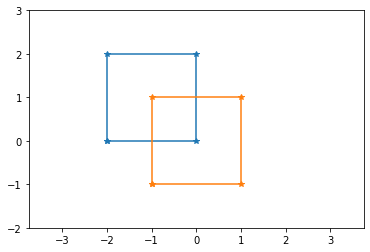

In [41]:
# original points
x  = [ -2, -2, 0, 0, -2 ]
y  = [ 0, 2, 2, 0, 0 ]
# transformed points
xp = [-1, -1, 1, 1, -1]
yp = [-1, 1, 1, -1, -1]

x  = [ -2, -2, 0, 0, -2 ]
y  = [ 0, 2, 2, 0, 0 ]
# transformed points
xp = [-1, -1, 1, 1, -1]
yp = [-1, 1, 1, -1, -1]


# plot
plt.plot( x, y, "*-", color='#1f77b4' )
plt.plot( xp, yp, "*-", color='#ff7f0e' )
plt.axis( [-3.75,3.75,-2,3])


In [95]:
##Edit this cell to answer the question.
x  = [ -2, -2, 0, 0, -2 ]
y  = [ 0, 2, 2, 0, 0 ]
con = [ 1.0 for i in range(len(x))] 

p = np.matrix([x,y,con])
mp = p.copy()
T1= np.matrix([[1,0,1], [0,1,-1], [0,0,1]])
mp = T1*mp
print(T1)


[[ 1  0  1]
 [ 0  1 -1]
 [ 0  0  1]]


In [96]:
from answercheck import checkanswer
checkanswer.matrix(T1,'90f95b61a6cf37050e7ae25f95046515');


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.  0.  1.]
 [ 0.  1. -1.]
 [ 0.  0.  1.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 2b:</font>** (4 pts)  Now, we can rotate the square (the blue square) around the origin by 45 degrees clockwise (the orange square). Construct a rotation matrix that performs a rotation by 45 degrees clockwise and store it in Python variable `R` as $3\times3$ matrix.

To help you visualize the transformation consider the figure below.

(-3.75, 3.75, -2.0, 3.0)

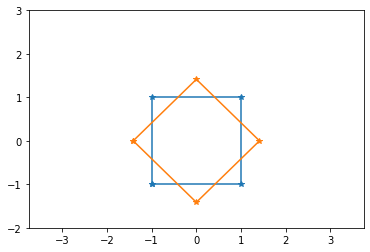

In [88]:
# original points
x = [-1, -1, 1, 1, -1]
y = [-1, 1, 1, -1, -1]
# transformed points
xp = [-1.41421, 0, 1.41421, 0, -1.41421]
yp = [0, 1.41421, 0, -1.41421, 0]

# plot
plt.plot( x, y, "*-", color='#1f77b4' )
plt.plot( xp, yp, "*-", color='#ff7f0e' )
plt.axis( [-3.75,3.75,-2,3])


[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


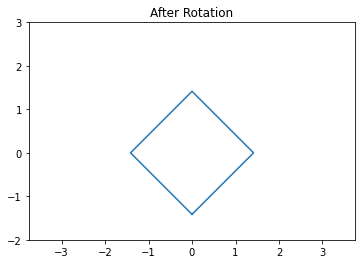

In [89]:
##Edit this cell to answer the question.
degrees = 45
theta = degrees * np.pi / 180  

R = np.matrix([[np.cos(theta),-np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]]) 
#Apply matrix
mp = p.copy()
mp = R*T1*mp

#Plot points after rotate
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='#1f77b4')
plt.axis('scaled')
plt.axis([-3.75,3.75,-2,3])
plt.title('After Rotation')

print(R)


In [90]:
from answercheck import checkanswer
checkanswer.matrix(R,'96491aabf1a23f1090aeea4596f579df');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]
Answer seems to be incorrect



AssertionError: Answer is incorrect 05fd5fa50be0b9301c392221a601a1b2

&#9989;  **<font color=red>QUESTION 2c:</font>** (4 pts)  Next, we need to schrink the rotated square (the blue square) by a factor of $\sqrt{2}$ (the orange square). Construct a scaling matrix that scales along the $x$ and $y$ axis by $1/\sqrt{2}$ and store it in Python variable `S`.

To help you visualize the transformation consider the figure below.

(-3.75, 3.75, -2.0, 3.0)

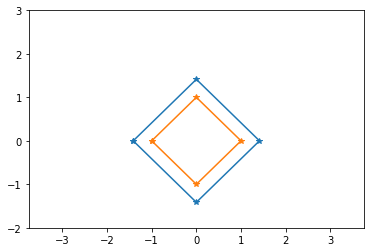

In [67]:
# original points
x = [-1.41421, 0, 1.41421, 0, -1.41421]
y = [0, 1.41421, 0, -1.41421, 0]
# transformed points
xp = [-1, 0, 1, 0, -1]
yp = [0, 1, 0, -1, 0]

# plot
plt.plot( x, y, "*-", color='#1f77b4' )
plt.plot( xp, yp, "*-", color='#ff7f0e' )
plt.axis( [-3.75,3.75,-2,3])


[[0.70710678 0.         0.        ]
 [0.         0.70710678 0.        ]
 [0.         0.         1.        ]]


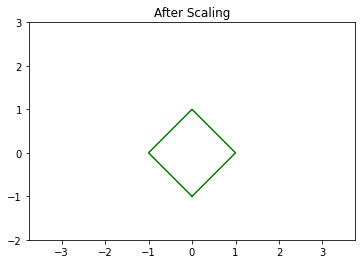

In [97]:
##Edit this cell to answer the question.
S = np.matrix([[1/(mth.sqrt(2)),0,0], [0,1/(mth.sqrt(2)),0], [0,0,1]])
mp = p.copy()
mp = S*R*T1*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-3.75,3.75,-2,3])
plt.title('After Scaling')
#plt.plot([p[0,14],mp[0,14]],[p[1,14],mp[1,14]], color='blue');
print(S)


In [98]:
from answercheck import checkanswer
checkanswer.matrix(S,'74bb9a4ee83d0d589f58ce3bdc95d160');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[0.70711 0.      0.     ]
 [0.      0.70711 0.     ]
 [0.      0.      1.     ]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 2d:</font>** (4 pts) Our final move is to translate the diamond (the blue square) so that its center is at position $(1,1)$ (the orange square). Construct a translation matrix that translates $(0,0)$ to $(1,1)$ and store it in Python variable `T2`.

To help you visualize the transformation consider the figure below.

(-3.75, 3.75, -2.0, 3.0)

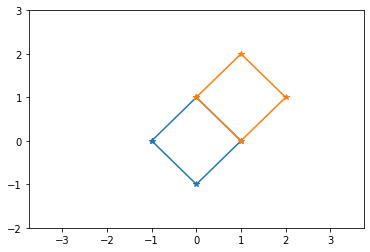

In [73]:
# original points
x = [-1, 0, 1, 0, -1]
y = [0, 1, 0, -1, 0]
# transformed points
xp = [0, 1, 2, 1, 0]
yp = [1, 2, 1, 0, 1]

# plot
plt.plot( x, y, "*-", color='#1f77b4' )
plt.plot( xp, yp, "*-", color='#ff7f0e' )
plt.axis( [-3.75,3.75,-2,3])


In [99]:
##Edit this cell to answer the question.
p = np.matrix([x,y,con])
mp = p.copy()

T2 = np.matrix([[1,0,1], [0,1,1], [0,0,1]])

mp = T2*mp

print(T2)

[[1 0 1]
 [0 1 1]
 [0 0 1]]


In [100]:
from answercheck import checkanswer
checkanswer.matrix(T2,'312c24e5e5aa4504ce2c9a68689660ec');


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[1. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 2e:</font>** (5 pts) We now have the sequence of transformations that turns the square with vertices at $(0,0)$, $(-2,0)$, $(-2,2)$ and $(0,2)$ into a diamond with vertices at $(1,0)$, $(0,1)$, $(1,2)$ and $(2,1)$. They are:

- translation `T1`
- rotation `R`
- scaling `S`
- translation `T2`

Calculate the final transformation matrix `P` as the composition of the above operations and print the result below.

In [93]:
##Edit this cell to answer the question.
p = np.matrix([x,y,con])
mp = p.copy()
P =  T2*S*R*T1*mp
print(P)


[[2. 1. 2. 3. 2.]
 [0. 1. 2. 1. 0.]
 [1. 1. 1. 1. 1.]]


In [94]:
from answercheck import checkanswer
checkanswer.matrix(P,'bfd8207308885370dc1e1252081d82c5');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[2. 1. 2. 3. 2.]
 [0. 1. 2. 1. 0.]
 [1. 1. 1. 1. 1.]]
Answer seems to be incorrect



AssertionError: Answer is incorrect b3e8a956a3bad8d392b0ff33f7698397

 In what order the matrices need to be multiplied? Does your result coincide with the matrix $M$ that you calculated in the first problem?

Put your answer here

&#9989;  **<font color=red>QUESTION 2f:</font>** (7 pts) What would happen if we confuse the order of multiplication? Construct a transformation `Z` where you multiply the same operations `T1`, `R`, `S` and `T2` but in the order opposite to the correct one. Calculate matrix `Z` and use it to find how the vertices of the square transform in this case. Plot side by side the original square and the geometrical shape achieved by the transformation `Z` similar to how the square and diamond are plotted in the previous figures.

In [78]:
##Edit this cell to answer the question.

Z = T1*R*S*T2*mp
print(Z)


[[0.5 0.5 1.5 1.5 0.5]
 [0.5 1.5 1.5 0.5 0.5]
 [1.  1.  1.  1.  1. ]]


In [79]:
from answercheck import checkanswer
checkanswer.matrix(Z,'690df4ddbafa09759cb50a3d04d9344d');

Testing [[0.5 0.5 1.5 1.5 0.5]
 [0.5 1.5 1.5 0.5 0.5]
 [1.  1.  1.  1.  1. ]]
Answer seems to be incorrect



AssertionError: Answer is incorrect 1cb44dfa8d335f5f86c7df5b12243bbb

In [ ]:
# Put your plotting code here to have the original and transformed shapes side by side


Is `Z` the same as `P`? Explain your results.

Put your answer here

---
<a name=Stitch-Images-together></a>
# 3.  (22 pts) Inverse Transform



Consider now a problem of transforming the diamond back into square. This is achieved by the _inverse_ transform.

&#9989;  **<font color=red>QUESTION 3a:</font>** (8 pts)  Use the `rref` function in `sympy` to find the inverse of the transformation `P` and store it as `P_inv`. (Hint: you can use `numpy.concatenate` to join two $3\times 3$ matrices into one $3\times 6$ matrix.)

In [91]:
##Edit this cell to answer the question.
P_inv,_ = sym.Matrix(P).rref()

print(P_inv)


Matrix([[1, 0, 0, 0.999999999999999, 1.00000000000000], [0, 1, 0, -1.00000000000000, 0], [0, 0, 1, 1.00000000000000, 0]])


In [92]:
from answercheck import checkanswer
checkanswer.matrix(P_inv,'3f74e2552cd1083f22eb4dcf4736ff1d');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 1.  0.  0.  1.  1.]
 [ 0.  1.  0. -1.  0.]
 [ 0.  0.  1.  1.  0.]]
Answer seems to be incorrect



AssertionError: Answer is incorrect 39044412890ed371f33178145070d047

&#9989;  **<font color=red>QUESTION 3b:</font>** (10 pts)  Write down the matrices for the inverse transformations of `T1`, `R`, `S` and `T2` in **QUESTION 2**. For instance, `T1` is a translation by $1$ in $x$ direction and $-1$ in $y$ direction, thus, the inverse is a translation by $-1$ in $x$ direction and $1$ in $y$ direction. Store the results in variables `T1_inv`, `R_inv`, `S_inv` and `T2_inv`.

In [102]:
##Edit this cell to answer the question.
T1_inv=np.matrix([[1,0,-1],[0,1,1],[0,0,1]])
print(T1_inv)
R_inv= np.matrix([[np.cos(theta),np.sin(theta),0],[np.sin(theta), -np.cos(theta),0],[0,0,1]])
print(R_inv)
S_inv= np.matrix([[-1/(mth.sqrt(2)),0,0], [0,-1/(mth.sqrt(2)),0], [0,0,1]])
print(S_inv)
T2_inv= np.matrix([[1,0,-1], [0,1,-1], [0,0,1]])
print(T2_inv)


[[ 1  0 -1]
 [ 0  1  1]
 [ 0  0  1]]
[[ 0.70710678  0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]]
[[-0.70710678  0.          0.        ]
 [ 0.         -0.70710678  0.        ]
 [ 0.          0.          1.        ]]
[[ 1  0 -1]
 [ 0  1 -1]
 [ 0  0  1]]


&#9989;  **<font color=red>QUESTION 3c:</font>** (4 pts)  As we know, if $A$, $B$, $C$, $\dots$ are invertible, we have 
$$(ABC\dots)^{-1}=\dots C^{-1}B^{-1}A^{-1}.$$
Based on this rule, use the inverse transformation matrices to construct the inverse of $P$ and check whether it is the same as you obtained in the previous question. Store the inverse constructed as product in variable `P_inv2`.

In [103]:
##Edit this cell to answer the question.
P = T2*S*R*T1*mp


P_inv2 = T1_inv*R_inv*S_inv*T2_inv
print(P_inv2)


[[-5.00000000e-01 -5.00000000e-01 -1.11022302e-16]
 [-5.00000000e-01  5.00000000e-01  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [104]:
from answercheck import checkanswer
checkanswer.matrix(P_inv2,'3f74e2552cd1083f22eb4dcf4736ff1d');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[-0.5 -0.5  0. ]
 [-0.5  0.5  1. ]
 [ 0.   0.   1. ]]
Answer seems to be incorrect



AssertionError: Answer is incorrect 0d3c27741fa25f2541393358bc5f47cc

---
<a name=Stitch-Images-together></a>
# 4.  (24 pts) Transforms in three spatial dimensions



In the previous exercises we considered transformations in two spatial dimensions. To accommodate translations we embedded two-dimensional transformations in three-dimensional matrices. Without translations we could have used $2\times 2$ matrices.

In general, if we write linear transformations on $\mathbb{R}^n$ that include rotations, reflections, scaling and shearing we need $n\times n$ matrices. If we also include translation, we need $(n+1)\times(n+1)$ matrices with the last row containing $0$s except of $1$ on the diagonal.

In this exercise we consider transformations on $\mathbb{R}^3$, i.e. three-dimensional space without translation. In this case it is enough to work with $3\times3$ matrices.


&#9989;  **<font color=red>QUESTION 4a:</font>** (8 pts)  Use python code to construct the following three $3\times 3$ transformation matrices: 
+ Rotation matrix `Ry` with angle `degreey`$=135^\circ$ (rotate about y axis)
+ Rotation matrix `Rz` with angle `degreey`$=60^\circ$ (rotate about z axis)
+ Shearing matrix `SH` with parameter `sh`$=1.0$ (adding the $y$ component to the $x$ component)

Note that by default the rotation is counted _counterclockwise_.

In [119]:
## Finish the code in this cell.
degreey = 135
Ry = np.matrix([[np.cos(degreey), 0, np.sin(degreey)],[0,1,0], [(-1)*np.sin(degreey),0, np.cos(degreey)]])

degreez = 60
Rz = np.matrix([[np.cos(degreez), (-1)*np.sin(degreez), 0], [np.sin(degreez), np.cos(degreez),0], [0,0,1]])

sh = 1.0 
SH = 0 

In [120]:
checkanswer.matrix(Ry,'39e48c5d5e63284cbf33fd87455d5495');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[-0.99609  0.       0.08837]
 [ 0.       1.       0.     ]
 [-0.08837  0.      -0.99609]]
Answer seems to be incorrect



AssertionError: Answer is incorrect 057ec9677e854bb9f62b982addbfdfb2

In [116]:
checkanswer.matrix(Rz,'10e0d5483fd7ef4570639297348a8c88');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[-0.95241  0.30481  0.     ]
 [-0.30481 -0.95241  0.     ]
 [ 0.       0.       1.     ]]
Answer seems to be incorrect



AssertionError: Answer is incorrect bfb199a4566ef53baca9bf606d834a72

In [ ]:
checkanswer.matrix(SH,'95217d95cc21e692bd9b148c6f38a725');

&#9989;  **<font color=red>QUESTION 4b:</font>** (4 pts)  Combine the three matrices into one transfrom matrix in the way that shear is applied first, then rotation along $z$ and then rotation along $y$. Store the result in variable `M`.

In [121]:
### Put your answer here

M = Ry*Rz*SH

In [122]:
from answercheck import checkanswer
checkanswer.matrix(M,'df1a0ca82c8b2661d5a399075db1df22');


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Answer seems to be incorrect



AssertionError: Answer is incorrect 654bb1cc65b472ab99f683968d7a62d2

&#9989;  **<font color=red>QUESTION 4c:</font>** (8 pts)  Calculate the inverse of `M` and store it in `M_inv`.

In [123]:
### Put your answer here
M_inv,_ = sym.Matrix(M).rref()
print(M_inv)

Matrix([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])


In [124]:
from answercheck import checkanswer
checkanswer.matrix(M_inv,'6399ce5e0d0710494b723be1b2d7b005');


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Trying to convert to float using ```A = A.astype(float)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Answer seems to be incorrect



AssertionError: Answer is incorrect 654bb1cc65b472ab99f683968d7a62d2

&#9989;  **<font color=red>QUESTION 4d:</font>** (4 pts) Consider a point whose coordinates after the transformation `M` are $(-1,-1,-1)$. Where was this point before the transformation matrix was applied? Print the result below

In [ ]:
### Put your answer here

p = 0
print(p)


---------
### Congratulations, we're done!
